# El MEF para vigas de Bernoulli-Euler

## Matriz de rigidez de un elemento-viga de Bernoulli-Euler

Análisis de Estructuras. Grado en Ingeniería Civil. 

Autores: 
- Alejandro E. Martínez-Castro, Esther Puertas García, Rafael Gallego.
- Dpto. Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Cuadernos MEF: Viga de Bernoulli-Euler</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro, Esther Puertas García, Rafael Gallego Sevilla</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.

En este cuaderno se va a obtener la expresión de la matriz de rigidez de una viga de Bernoulli-Euler. 

+ Se consideran los casos de inercia constante y variable. 

+ Se considerará la interpolación hermítica para los desplazamientos. 

Se definen los símbolos para las variables y funciones, con el paquete SymPy

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


En primer lugar, se definen las funciones de Hermite. Se toman directamente del notebook "El MEF para vigas. Funciones e Forma Hermíticas"

In [2]:
L = Symbol('L')
h1 = 1 - 3*x**2/L**2 + 2*x**3/L**3
h2 = x - 2*x**2/L + x**3/L**2
h3 = 3*x**2/L**2 - 2*x**3/L**3
h4 = -x**2/L + x**3/L**2

Se definen los símbolos para el módulo elástico y el momento de inercia 

In [3]:
E, I = symbols('E I')

Se define en una matriz-columna las funciones de interpolación. 

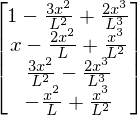

In [4]:
from sympy import Matrix
funciones = Matrix([[h1, h2, h3, h4]]) 
funciones.T # Se visualiza traspuesta para una mejor visualización de las 4 funciones en filas aparte.

A continuación se derivan las funciones anteriores 2 veces, para formar la matriz $\mathbf{B_f}$

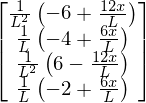

In [5]:
Bf = funciones.diff(x,2) 
Bf.T 

Se construye la matriz de rigidez

\begin{equation}
\mathbf{K} = \int_{0}^{L} \mathbf{B_f}^T \cdot \mathbf{D} \cdot \mathbf{B_f} \, \mathrm{d}x 
\end{equation}

con $\mathbf{D} = E \,I$

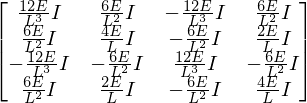

In [6]:
Krigidez = integrate(E* I * Bf.T.multiply(Bf),(x,0,L)) # Producto matricial 
Krigidez

Esta matriz es idéntica a la matriz de flexión que se ha obtenido para un elemento de pórtico plano. 


## Matriz de rigidez de elemento-viga de inercia variable

La formulación vista anteriormente permite obtener la matriz de rigidez para una barra de inercia variable.

En primer lugar se definen los símbolos que van a emplearse para I1 e I2 (inercias inicial y final). 

Se considera una transición de inercia con variación lineal:

$$ Inercia (x) = I_1 + \dfrac{I_2 - I_1}{L} \cdot x$$

(Las variaciones de inercia "realistas" son cuadráticas o cúbicas para variación lineal de canto. Piense el motivo)

In [7]:
I1, I2, Inercia = symbols('I1 I2 Inercia')

In [8]:
Inercia = I1 + (I2 - I1) / L * x

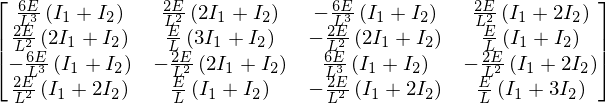

In [9]:
Krigidez_Ivar = integrate(E*Inercia * Bf.T.multiply(Bf),(x,0,L)) # Producto matricial
Krigidez_Ivar.simplify()
Krigidez_Ivar

Es fácil verificar que esta matriz degenera en la matriz de rigidez para el caso de inercia constante. 

Para esto, basta sustituir en la anterior matriz las inercias I2 e I1 por I. 

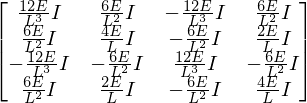

In [10]:
Krigidez_Ivar.subs([(I2,I),(I1,I)])

Para comprobar que se ha obtenido la matriz de rigidez para el caso de inercia constante, se restarán ambas expresiones. 

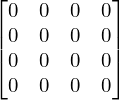

In [11]:
Krigidez_Ivar.subs([(I2,I),(I1,I)]) - Krigidez